In [3]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import tree
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn

In [4]:
# =============================================================================
# Clasificación
# =============================================================================
# importamos datos de sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(data['target'][0:5]) # es la variable target
print(data['data'].shape) # 569 filas 30 columnas
print(data['feature_names']) # nombre de las variables
print(data['target_names']) # significado del target
print(data['DESCR'])

[0 0 0 0 0]
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation o

In [5]:
dt=pd.DataFrame(data['data'],columns=data['feature_names'])
dt['Diagnosis']=np.where(data.target==1, "Malignant","Bening")
dt.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')

In [9]:
dt.head(1).T

,0
mean radius,17.99
mean texture,10.38
mean perimeter,122.8
mean area,1001
mean smoothness,0.1184
mean compactness,0.2776
mean concavity,0.3001
mean concave points,0.1471
mean symmetry,0.2419
mean fractal dimension,0.07871


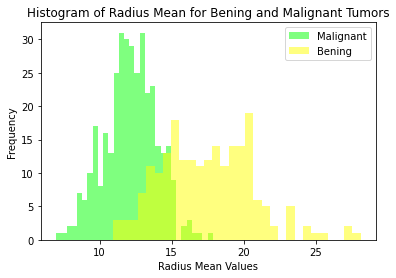

In [11]:
# histograma
m = plt.hist(dt.loc[dt["Diagnosis"] == "Malignant","mean radius"], 
             bins=30,
             fc = (0,1,0,0.5),
             label = "Malignant")# fc es el color y la transparencia
b = plt.hist(dt.loc[dt["Diagnosis"] == "Bening","mean radius"],
             bins=30,
             fc = (1,1,0,0.5),
             label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [12]:
from sklearn.tree import DecisionTreeClassifier
X=dt.drop('Diagnosis',axis=1)
y=data['target'] # 0 o 1

# aqui construimos un modelo
model = DecisionTreeClassifier()
#(max_depth=10)
# cada modelo tiene una función que dice que parametros tiene
# estos serian los parametros por defecto
print(model.get_params())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
tree_model=model.fit(X_train,y_train)
print("Train score", tree_model.score(X_train,y_train))
print("Test score", tree_model.score(X_test, y_test))
# train
y_pred=tree_model.predict(X_train)
probs=tree_model.predict_proba(X_train)
print("Train AUC", sklearn.metrics.roc_auc_score(y_train, probs[:,1]))
print("Train Accuracy", sklearn.metrics.accuracy_score(y_train,y_pred))
# test
y_pred=tree_model.predict(X_test)
probs=tree_model.predict_proba(X_test)
print("Test AUC", sklearn.metrics.roc_auc_score(y_test, probs[:,1]))
print("Test Accuracy",  sklearn.metrics.accuracy_score(y_test,y_pred))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
Train score 1.0
Test score 0.9035087719298246
Train AUC 1.0
Train Accuracy 1.0
Test AUC 0.90327430671567
Test Accuracy 0.9035087719298246


In [14]:
print(tree.export_graphviz(tree_model) )

with open("classifier.txt", "w") as f:
    f = tree.export_graphviz(tree_model, out_file=f,  feature_names = data['feature_names'])

digraph Tree {
node [shape=box] ;
0 [label="X[20] <= 16.795\ngini = 0.469\nsamples = 455\nvalue = [171, 284]"] ;
1 [label="X[27] <= 0.144\ngini = 0.151\nsamples = 303\nvalue = [25, 278]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[10] <= 1.048\ngini = 0.043\nsamples = 276\nvalue = [6, 270]"] ;
1 -> 2 ;
3 [label="X[13] <= 33.005\ngini = 0.036\nsamples = 275\nvalue = [5, 270]"] ;
2 -> 3 ;
4 [label="X[14] <= 0.003\ngini = 0.016\nsamples = 252\nvalue = [2, 250]"] ;
3 -> 4 ;
5 [label="X[8] <= 0.176\ngini = 0.278\nsamples = 6\nvalue = [1, 5]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 5\nvalue = [0, 5]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
5 -> 7 ;
8 [label="X[21] <= 33.27\ngini = 0.008\nsamples = 246\nvalue = [1, 245]"] ;
4 -> 8 ;
9 [label="gini = 0.0\nsamples = 231\nvalue = [0, 231]"] ;
8 -> 9 ;
10 [label="X[1] <= 23.2\ngini = 0.124\nsamples = 15\nvalue = [1, 14]"] ;
8 -> 10 ;
11 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"

https://dreampuf.github.io/GraphvizOnline/

In [20]:
# =============================================================================
# Building a tree decision model
# =============================================================================
# especificando el modelo
model = DecisionTreeClassifier()

# vemos los parametros que puede tener
print(model.get_params())
params={'max_depth': [2,4,5,6,8,10],# Maxima pofundidad del arbol #5
        'max_leaf_nodes': [5,10,15], # maximo de hojas del arbol #3
        'min_impurity_decrease' : [0.05,0.1,0.01],#2 # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [3,6,9,15,20], ##4 The minimum number of samples required to split an internal node:
        'ccp_alpha': [0.0,0.1,0.2]#2 #240
        }


# scoring: lista de metricas a obtener
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scoring = ['accuracy', 'roc_auc']

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [21]:
# CV
n_cv=5
# creamos la GridSeacrh # cross-validation
grid_solver = GridSearchCV(estimator = model, # model to train
                   param_grid = params, # param_grid
                   scoring = scoring,
                   cv = n_cv,
                   refit = 'roc_auc',# cuando tienes mas de un score para tener un criterio de cual es el mejor modelo
                   verbose = 1)



model_result = grid_solver.fit(X_train,y_train)
# hemos ajustado el modelo

# best score es la media del best estimator
print("Mejor score:", model_result.best_score_)
# tenemos los mejores parametros
print("Mejores parametros:",model_result.best_params_)

# En este caso el score devuelve el roc_auc
print("Score:", model_result.score(X_train,y_train)) # score devulve la metrica del refit
# Train
y_pred=model_result.predict(X_train)
probs=model_result.predict_proba(X_train)
print(" Train AUC:", sklearn.metrics.roc_auc_score(y_train,probs[:,1]))
print("Train Accuracy:", sklearn.metrics.accuracy_score(y_train,y_pred))

# test
model_result.score(X_test,y_test)
y_pred=model_result.predict(X_test)
probs=model_result.predict_proba(X_test)
print(" Test AUC:", sklearn.metrics.roc_auc_score(y_test,probs[:,1]))
print(" Test Accuracy:", sklearn.metrics.accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mejor score: 0.9412354415450389
Mejores parametros: {'ccp_alpha': 0.0, 'max_depth': 6, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 15}
Score: 0.9772156329791615
 Train AUC: 0.9772156329791615
Train Accuracy: 0.9736263736263736
 Test AUC: 0.9216505178750417
 Test Accuracy: 0.8947368421052632


[Parallel(n_jobs=1)]: Done 4050 out of 4050 | elapsed:   37.2s finished


In [22]:
# tenemos un atributo del mejor modelo
best_model=model_result.best_estimator_


# nos quedamos con el mejor modelo y reestimamos con toda la muestra
final_model=best_model.fit(X,y)

In [27]:
# importancia de variables
len(X.columns)
len(final_model.feature_importances_)
importances=pd.DataFrame([X.columns,final_model.feature_importances_], index=["feature","importance"]).T
print(importances.sort_values("importance", ascending = False).head(10))

                 feature importance
20          worst radius   0.769188
27  worst concave points   0.153638
21         worst texture   0.077174
0            mean radius          0
1           mean texture          0
28        worst symmetry          0
26       worst concavity          0
25     worst compactness          0
24      worst smoothness          0
23            worst area          0


In [28]:
# resultados de la cross validation con parameter tunning
results=model_result.cv_results_
results=pd.DataFrame(results)

In [29]:
results.head(2).T

,0,1
mean_fit_time,0.00478711,0.00419006
std_fit_time,0.0009777,0.000397173
mean_score_time,0.00478754,0.00438643
std_score_time,0.00182866,0.00232285
param_ccp_alpha,0,0
param_max_depth,2,2
param_max_leaf_nodes,5,5
param_min_impurity_decrease,0.05,0.05
param_min_samples_split,3,6
params,"{'ccp_alpha': 0.0, 'max_depth': 2, 'max_leaf_n...","{'ccp_alpha': 0.0, 'max_depth': 2, 'max_leaf_n..."


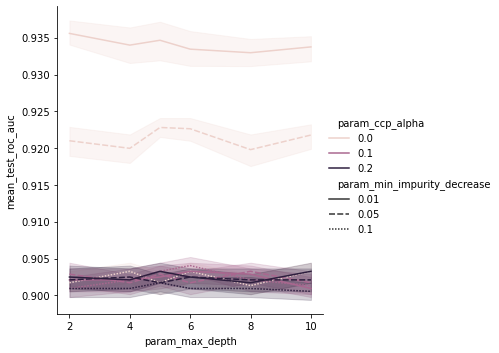

In [30]:
sns.relplot(x="param_max_depth", 
            y="mean_test_roc_auc", 
            hue="param_ccp_alpha",
            style="param_min_impurity_decrease",
            kind = "line", data=results)



In [ ]:
params={'max_depth': [4,6,8],# Maxima pofundidad del arbol
        'max_leaf_nodes': [10], # maximo de hojas del arbol
        'min_impurity_decrease' : [0.05], # un nuevo nodo se harà si al hacerse se decrece la impurity en un threshold por encima del valor
        'min_samples_split': [3,6,9,15], # The minimum number of samples required to split an internal node:
        'ccp_alpha': [0.0,0.1]
        }